# **Machine Learning - Assignment 2**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*

## Introduction - Scikit-Learn, Linear Regression and Linear Classifiers

In this assignment, we will start by introducing the Python library `scikit-learn` (or `sklearn`), which is a powerful tool for data analysis and machine learning. You will be asked to reproduce some of the experiments of the first assignment using `scikit-learn`, and play with the library to get a better understanding of how it works. Then, we will move to linear regression and linear classifiers, with both understanding and coding exercises.

**Starting:**
* To start working on the assignment in Colab, save a copy on your Google Drive (`File` $\rightarrow$ `Save a copy in Drive`).

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Understand how to use `scikit-learn` for data analysis and machine learning
* Be able to formulate the basic least squares regression models and derive its optimal estimators
* Comprehend the idea and use of polynomial and transformed regression
* Know how a perceptron classifier is optimized

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.


## 0 - Scikit-Learn (**Coding**)

Scikit-Learn is a powerful tool for data analysis and machine learning. It provides a wide range of tools for building models, evaluating them, and using them to make predictions. In this exercise, we will use `scikit-learn` to reproduce some of the experiments of the first assignment.

First, we'll go again through a small tutorial of the new library.

### **Tutorial** - Sci-kit Learn Basics

In [1]:
!pip install numpy
!pip install matplotlip
!pip install scikit-learn

**Creating datasets**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

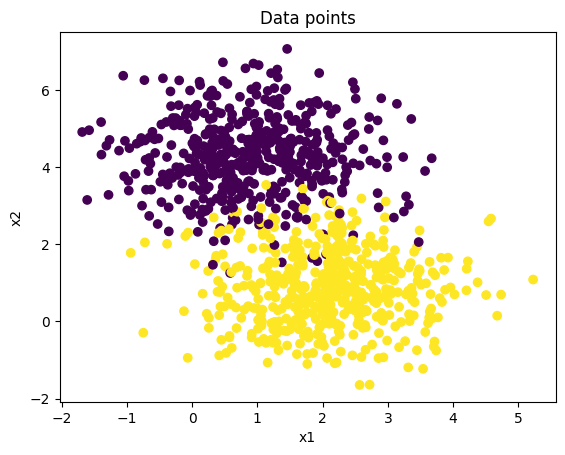

In [3]:
# In sklearn we can use predefined functions to create datasets, similar to
# prtools ones, for example make_blobs, which generates isotropic Gaussian blobs for clustering

X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

# Note that the random_state parameter is used to generate the same dataset each time the code is run.
# Removing this parameter will generate a different dataset each time the code is run.


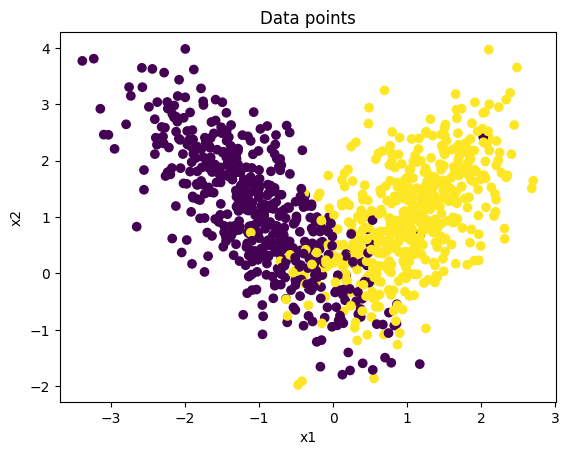

In [4]:
#Another example is make_classification, which generates a random n-class classification problem

X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

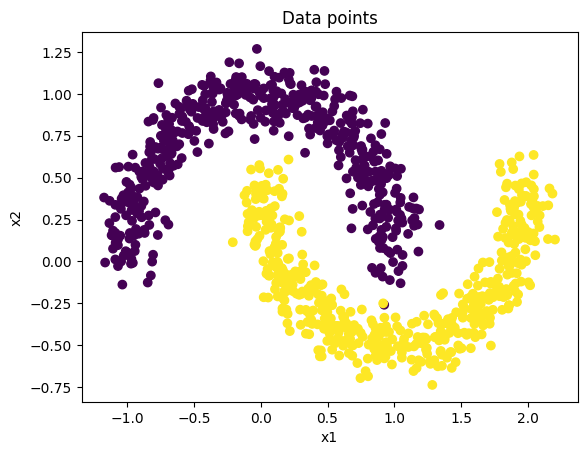

In [5]:
#... or make_moons, which give use banana shaped data points

X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()


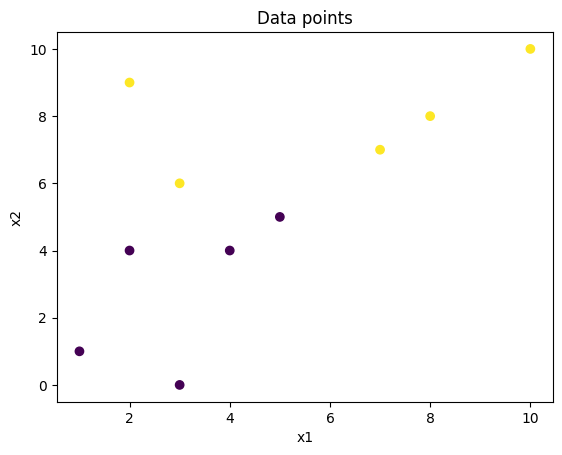

In [6]:
# Of course, it is also possible to manually create datasets using numpy, as we have seen in the previous assignment

X = np.array([[1, 1], [2, 4], [3, 0], [4, 4], [5, 5], [3, 6], [7, 7], [8, 8], [2, 9], [10, 10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()


**Training and testing**

In [7]:
# Now, we want to train a classifier on the generated data points. In sklearn, it is
# easy to split the data into training and test sets using the train_test_split function

from sklearn.model_selection import train_test_split

# Select the desired dataset. Some examples are listed below:

X, y = datasets.make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
#X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)
#X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
# other examples can be found at: https://scikit-learn.org/stable/api/sklearn.datasets.html

# the parameters can control the size of the test set and the random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:

# Then, we can train a classifier on the training set and evaluate it on the test set.
# We have a variety of classifiers available in sklearn, such as:

from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
# other examples can be found at: https://scikit-learn.org/stable/supervised_learning.html

# Select the desired classifier to try

clf = SVC()
#clf = NearestCentroid()
#clf = LogisticRegression()

clf.fit(X_train, y_train)


SVC()

In [9]:
# Now, we can evaluate the classifier on the training set

y_pred = clf.predict(X_train)

accuracy = np.mean(y_pred == y_train)
print('Accuracy on the training set:', accuracy)

# And on the test set

y_pred = clf.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print('Accuracy on the test set:', accuracy)


Accuracy on the training set: 0.92
Accuracy on the test set: 0.91


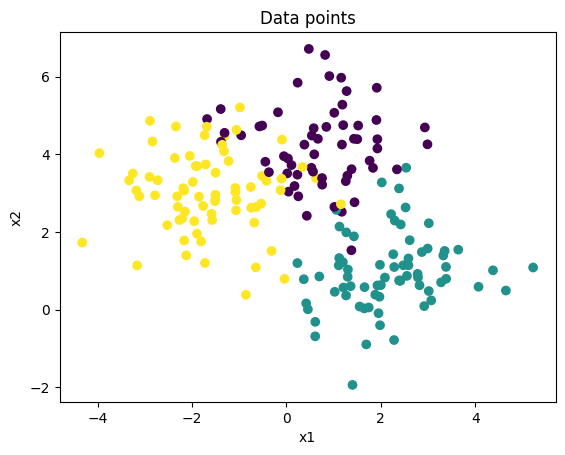

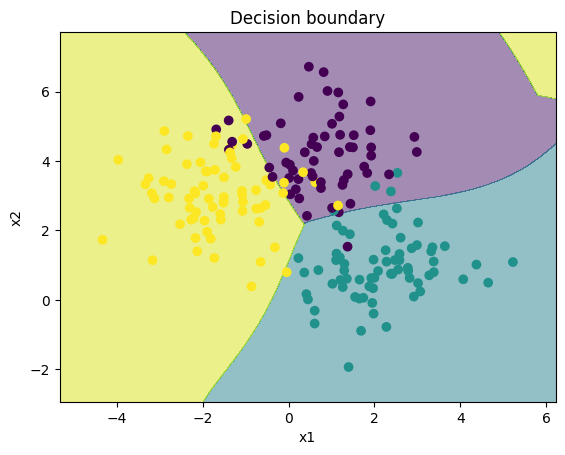

In [10]:

# We can also plot the decision boundary of the classifier (it might take a few seconds with a lot of data points)

# Let's plot the test set

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

# Let's plot the decision boundary

x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

"""np.meshgrid(x, y): get the Cartesian Product of x and y"""
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.5, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary')
plt.show()


In [11]:
# Sklearn also offers other tools to evaluate performance, like the confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)

Confusion matrix:
[[51  1  6]
 [ 4 67  0]
 [ 6  1 64]]


### **Exercise 0.1**

Experiment with the available classifiers in sci-kit learn. Try to use the `make_classification` function, or other of the built-in functions, to create a dataset and train a classifier on it. Last assignment, you were asked to use the following classifiers:

* ldc -> Linear discriminant analysis
* qdc -> Quadratic discriminant analysis
* nmc -> Nearest mean classifier
* fisherc -> Fishers linear discriminant
* knnc -> k-nearest neighbor classifier
* parzenc -> Parzen classifier
* naivebc -> Naive-Bayes classifier
* mogc -> Mixture-of-Gaussians classifier
* stumpc -> Decision stump classifier
* dectreec -> Decision tree classifier
* adaboostc -> AdaBoost
* svc -> Support vector classifier

Which of them are available in `scikit-learn`? Look at the documentation and try to use
as many as you can, analyzing which ones perform well on which datasets, and plotting the corresponding decision boundaries.


In [12]:
# WRITE YOUR OWN CODE HERE

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [13]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                                    n_classes=2, n_clusters_per_class=1, random_state=0)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred1 = clf.predict(x_train)
train_accuracy = np.mean(y_pred1 == y_train)  # or clf.score(x_train, y_train)
print("Accuracy on the training set: {}".format(train_accuracy))

y_pred2 = clf.predict(x_test)
test_accuracy = np.mean(y_pred2 == y_test)  # or clf.score(x_test, y_test)
print("Accuracy on the test set: {}".format(test_accuracy))
print()

conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix: ")
print(conf_matrix)

Accuracy on the training set: 0.91625
Accuracy on the test set: 0.935

Confusion Matrix: 
[[100   5]
 [  8  87]]


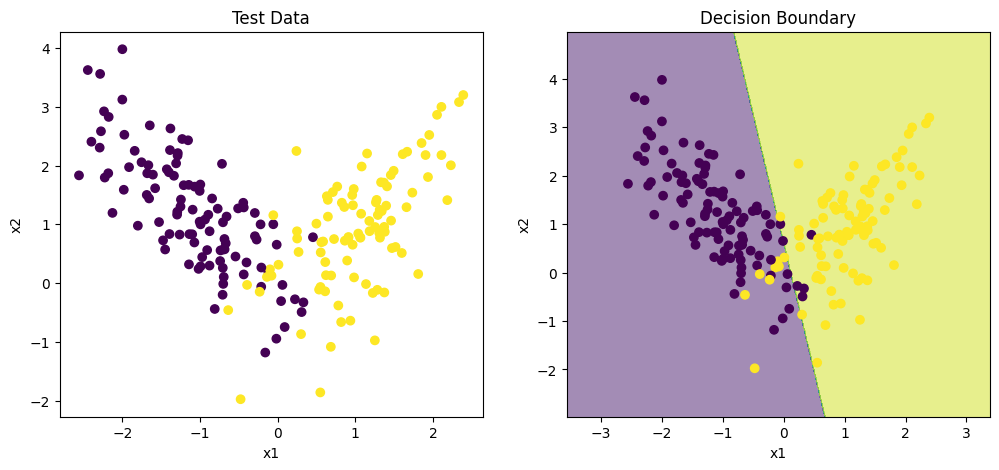

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c=y_test)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Test Data")


plt.subplot(1, 2, 2)

x1_min, x1_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
x2_min, x2_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)

plt.contourf(xx1, xx2, z, alpha=0.5, cmap='viridis')
plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c=y_test)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")

plt.show()

## 1 - Linear Least Squares without and with Intercept (**Pen \& Paper**)

### **Exercise 1.1**

Consider standard linear regression with the squared loss as the performance measure:

$$
\sum_{i=1}^{N} (x_i^T w - y_i)^2 = \|Xw - Y\|^2
$$

The (feature) vector $x_i \in \mathbb{R}^d$ is a column vector, while all features per object in $X \in \mathbb{R}^{N \times d}$ are in rows. $Y$ is an $N$-vector with all corresponding outputs. The aim is to minimize this sum of squared residuals between the linearly predicted and actual output over $w \in \mathbb{R}^d$.

### (a)
Assume that $(X^T X)^{-1}$ exists. Show that $(X^T X)^{-1} X^T Y$ gives least squares solution to the above problem, i.e., it minimizes $\|Xw - Y\|^2$.

### (b)
Given that $(X^T X)^{-1}$ exists, what does that tell us about the data? More specifically, what limitation on the number of observations does this imply, what does invertibility say about the dimensionality of the (affine) subspace our data is in, and what difference does the presence or absence of the origin in this subspace make? To what extent are these limitations enough to guarantee invertibility?

### (c)
Let us now allow for an intercept (or bias term), i.e., we also model a constant offset in the regression function. We do this by the trick of adding a column of ones to the matrix $X$. Let $Z$ refer to this new matrix. Consider standard linear regression (with intercept) with the squared loss as the performance measure, $\|Zw - Y\|^2$, which we want to minimize for $w$.

Assuming that $(Z^T Z)^{-1}$ exists, show that $(Z^T Z)^{-1} Z^T Y$ gives a least squares solution to this least squares problem. Given that $(Z^T Z)^{-1}$ exists, what does that tell us about how the data is scattered?



### **Solution to Exercise 1.1**
> Given by ChatGPT

#### **(a) Proof of the Least Squares Solution**

We are given the objective function:
$$
\|Xw - Y\|^2 = \sum_{i=1}^{N} (x_i^T w - y_i)^2
$$
This can be rewritten as:
$$
\|Xw - Y\|^2 = (Xw - Y)^T (Xw - Y)
$$
To minimize this with respect to $w$, we take the derivative and set it equal to zero.

1. **Expand the objective function:**
   $$
   f(w) = (Xw - Y)^T (Xw - Y) = (Xw)^T(Xw) - 2Y^T(Xw) + Y^T Y
   $$

2. **Differentiate with respect to $w$:**
   $$
   \frac{\partial f(w)}{\partial w} = 2X^T(Xw) - 2X^T Y
   $$

   Setting the derivative equal to zero:
   $$
   X^T Xw = X^T Y
   $$

3. **Solve for $w$:**
   $$
   w = (X^T X)^{-1} X^T Y
   $$

Since we assumed that $(X^T X)^{-1}$ exists, this is the solution that minimizes the squared loss. Therefore, $w = (X^T X)^{-1} X^T Y$ is the least squares solution.

#### **(b) Implications of the Existence of $(X^T X)^{-1}$**

For $(X^T X)^{-1}$ to exist, $X^T X$ must be invertible. This implies several things about the data:

1. **Number of Observations**:
   - $X^T X$ is a $d \times d$ matrix. For it to be invertible, it must be full rank, i.e., its rank must be $d$.
   - This requires that $N \geq d$, meaning we need at least as many observations as there are dimensions in the feature space.

2. **Dimensionality of the Subspace**:
   - The invertibility of $X^T X$ implies that the rows of $X$ (i.e., the feature vectors $x_i$) span a $d$-dimensional affine subspace. If the data does not span the full $d$-dimensional space (e.g., if the observations are linearly dependent or if they lie in a lower-dimensional subspace), $X^T X$ will be singular (non-invertible).

3. **Presence or Absence of the Origin**:
   - The presence or absence of the origin in this subspace indicates whether the subspace is an affine subspace or a linear subspace.
   - If the subspace includes the origin, it is a linear subspace; otherwise, it is an affine subspace.
   - However, for $X^T X$ to be invertible, what matters is that the rows of $X$ span the full $d$-dimensional space, regardless of whether the origin is included.

4. **Are these limitations enough to guarantee invertibility?**
   - Having $N \geq d$ and ensuring that the rows of $X$ are linearly independent is necessary for invertibility, but not sufficient if the rows are not spread out enough to cover the entire $d$-dimensional space.

#### **(c) Least Squares Solution with an Intercept Term**

We modify the matrix $X$ by adding a column of ones to account for the intercept term, resulting in a new matrix $Z$. This means that:
$$
Z = \begin{bmatrix} 1 & x_{11} & \dots & x_{1d} \\ 1 & x_{21} & \dots & x_{2d} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{N1} & \dots & x_{Nd} \end{bmatrix}
$$

The objective function becomes:
$$
\|Zw - Y\|^2
$$

1. **Derivative with respect to $w$:**
   $$
   f(w) = (Zw - Y)^T(Zw - Y)
   $$
   Differentiating:
   $$
   \frac{\partial f(w)}{\partial w} = 2Z^T(Zw) - 2Z^T Y
   $$
   Setting the derivative equal to zero:
   $$
   Z^T Z w = Z^T Y
   $$
   
2. **Solve for $w$:**
   $$
   w = (Z^T Z)^{-1} Z^T Y
   $$

This shows that $w = (Z^T Z)^{-1} Z^T Y$ is the least squares solution when an intercept term is included.

3. **What does the existence of $(Z^T Z)^{-1}$ tell us about the data?**
   - The existence of $(Z^T Z)^{-1}$ indicates that the data points (rows of $Z$) must span a $(d+1)$-dimensional affine space.
   - Since we've added a column of ones, $Z$ will always include the intercept dimension, ensuring that the subspace is affine.
   - To guarantee invertibility, the remaining dimensions (corresponding to the features) must be linearly independent, and we need at least $N \geq d + 1$ observations for $Z^T Z$ to be invertible. This ensures that the data covers the $d+1$ dimensions fully.

### **Exercise 1.2**

Consider a regression training data set with four 1D inputs $X = (-2, -1, 0, 3)^T$ and corresponding outputs $Y = (1, 1, 2, 3)^T$


#### (a)
Let us assume that we fit a linear function without intercept to this data under squared loss. Calculate the optimal function fit for the given data set

#### (b)
Let us now also include an intercept. Still, we stick to fitting linear functions that we fit using the squared loss. Calculate the optimal value that we find for the intercept.

#### (c)
Think of polynomial regression, what is the minimum polynomial degree that we need in order to fit the regression curve exactly to the training data? Is there a difference between the situation with and without intercept?



### **Solution to Exercise 1.2** (C)

> Given by ChatGPT

To fit the regression curve exactly to all the training data points, we need a polynomial that passes through all four points. **The minimum degree required for this is one less than the number of points, so a polynomial of degree 3 is needed.**

1. **With Intercept**: A cubic polynomial with an intercept can perfectly fit the four data points. The general form is:
   $$
   f(x) = a_3x^3 + a_2x^2 + a_1x + a_0
   $$

   We have four parameters ($a_3, a_2, a_1, a_0$), which match the number of points, ensuring a perfect fit.

2. **Without Intercept**: If we do not allow for an intercept, the polynomial takes the form:
   $$
   f(x) = a_3x^3 + a_2x^2 + a_1x
   $$
   
   In this case, we have only three parameters. Since we need four parameters to fit four points exactly, a polynomial without an intercept cannot perfectly fit the data unless it’s of degree 4 or higher.

## 2 - Polynomial Regression and Other Feature Transformations (**Coding**)

### **Exercise 2.1**

Consider the following regression problem from 2D to 1D. The input vectors $\mathbf{x}$ are from a standard normal distribution in 2D. The corresponding outputs, $y$, are obtained through the following equation: $y = 50 \sin(x_1) \sin(x_2) + \epsilon$, where $\epsilon$ has a standard normal distribution as well (but in 1D of course).


#### (a)
Visualize 10,000 samples from this regression problem and have a look at the data from different points of view.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

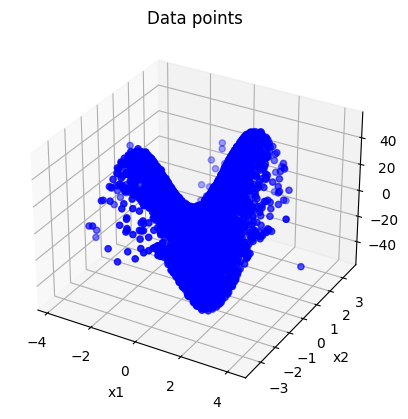

In [16]:
# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

"""NOTE: np.random.randn: standard normal distribution"""
X = np.random.randn(10000, 2)  # return 10000 by 2 data following standard normal distribution
y = 50 * np.sin(X[:, 0]) * np.sin(X[:, 1]) + np.random.randn(10000)

# Visualize the data with a 3d plot, with x1 and x2 as input and y as output

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')   # subplot position: the 1st one of 1 by 1
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Data points')
plt.show()


#### (b)
Fit a linear regression to these 10,000 points and measure the error on a separate test set. Also visualize the prediction on either the training set or the test set, and check how close it is to the true distribution.

R^2 on the training data: 0.00039107030534313303
R^2 on the test data: 0.00012527602869749632
MSE on the training data: 467.1978375801798
MSE on the test data: 458.83060052185635


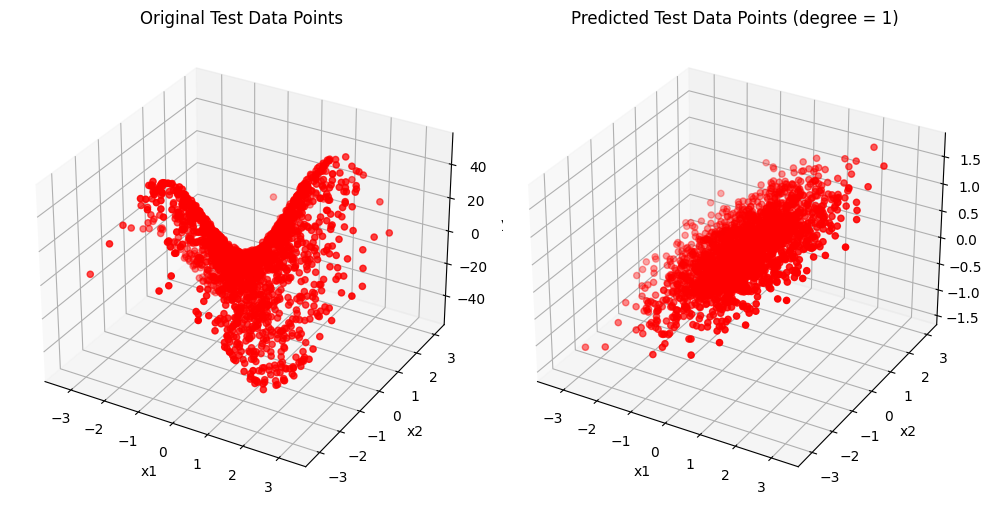

In [17]:
from sklearn.linear_model import LinearRegression

# WRITE YOUR OWN CODE HERE

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = LinearRegression()
clf.fit(x_train, y_train)

"""
Regressor.score(x, y):

Return the coefficient of determination of the prediction.

The coefficient of determination R^2 is defined as
(1 - \frac{u}{v}), where u is the residual
sum of squares ((y_true - y_pred)** 2).sum() and v
is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse
"""

y_train_pred = clf.predict(x_train)
print("R^2 on the training data: {}".format(clf.score(x_train, y_train)))

y_test_pred = clf.predict(x_test)
print("R^2 on the test data: {}".format(clf.score(x_test, y_test)))

# Calculate the MSE
mse_train = np.mean((y_train - y_train_pred) ** 2)
print("MSE on the training data: {}".format(mse_train))

mse_test = np.mean((y_test - y_test_pred) ** 2)
print("MSE on the test data: {}".format(mse_test))

"""
Alternative way:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
"""
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

ax[0].scatter(x_test[:, 0], x_test[:, 1], y_test, c='r', marker='o')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_zlabel('y')
ax[0].set_title('Original Test Data Points')

ax[1].scatter(x_test[:, 0], x_test[:, 1], y_test_pred, c='r', marker='o')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_zlabel('y')
ax[1].set_title('Predicted Test Data Points (degree = 1)')

plt.tight_layout()
plt.show()

#### (c)
Fit a second-degree linear regression to these 10,000 points. Again, measure the error on a separate test set. Try the same for some higher degrees. It would be nice to visualize these predictions and compare their distribution with the one of the labels and of the linear prediction, while increasing the degree of the polynomial.

> Note for `PolynomialFeatures`
>
> Generate **polynomial** and **interaction** features  
>
> For example, if the input features are $ x_1 $ and $ x_2 $, this will generate features: $ 1, x_1, x_2, x_1^2, x_1x_2, x_2^2 $.
```shell
>>> X
array([[0, 1],
       [2, 3],
       [4, 5]])
>>> poly = PolynomialFeatures(2)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])
```

MSE with degree = 2: 120.19102324468662
MSE with degree = 3: 120.03439544764107
MSE with degree = 4: 13.885332513538916


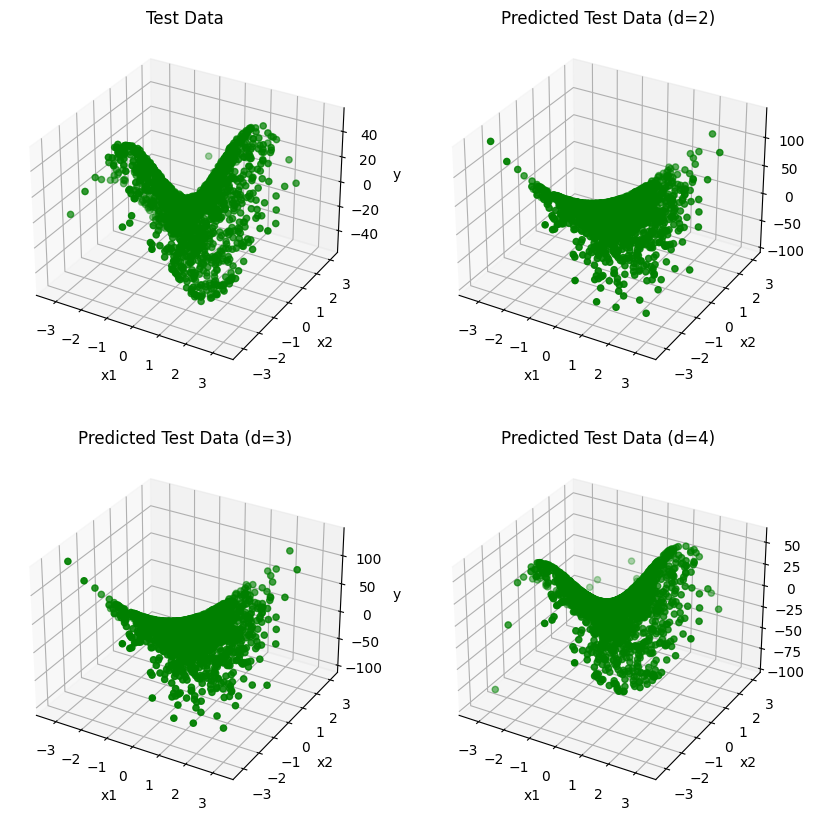

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# WRITE YOUR OWN CODE HERE

poly1 = PolynomialFeatures(degree=2)
poly2 = PolynomialFeatures(degree=3)
poly3 = PolynomialFeatures(degree=4)

x_train_poly1 = poly1.fit_transform(x_train)
x_test_poly1 = poly1.transform(x_test)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)

clf1, clf2, clf3 = LinearRegression(), LinearRegression(), LinearRegression()
clf1.fit(x_train_poly1, y_train)
clf2.fit(x_train_poly2, y_train)
clf3.fit(x_train_poly3, y_train)

y_test_poly1, y_test_poly2, y_test_poly3 = clf1.predict(x_test_poly1), clf2.predict(x_test_poly2), clf3.predict(x_test_poly3)

# MSE
print("MSE with degree = 2: {}".format(np.mean((y_test - y_test_poly1) ** 2)))
print("MSE with degree = 3: {}".format(np.mean((y_test - y_test_poly2) ** 2)))
print("MSE with degree = 4: {}".format(np.mean((y_test - y_test_poly3) ** 2)))

# plot
fig, ax = plt.subplots(2, 2, figsize=(10,10), subplot_kw={'projection': '3d'})

ax[0, 0].scatter(x_test[:, 0], x_test[:, 1], y_test, c='g')
ax[0, 0].set_xlabel('x1')
ax[0, 0].set_ylabel('x2')
ax[0, 0].set_zlabel('y')
ax[0, 0].set_title('Test Data')

ax[0, 1].scatter(x_test[:, 0], x_test[:, 1], y_test_poly1, c='g')
ax[0, 1].set_xlabel('x1')
ax[0, 1].set_ylabel('x2')
ax[0, 1].set_zlabel('y')
ax[0, 1].set_title('Predicted Test Data (d=2)')

ax[1, 0].scatter(x_test[:, 0], x_test[:, 1], y_test_poly2, c='g')
ax[1, 0].set_xlabel('x1')
ax[1, 0].set_ylabel('x2')
ax[1, 0].set_zlabel('y')
ax[1, 0].set_title('Predicted Test Data (d=3)')

ax[1, 1].scatter(x_test[:, 0], x_test[:, 1], y_test_poly3, c='g')
ax[1, 1].set_xlabel('x1')
ax[1, 1].set_ylabel('x2')
ax[1, 1].set_zlabel('y')
ax[1, 1].set_title('Predicted Test Data (d=4)')

plt.show()

#### (d)
A degree of 2 (or more) can improve the performance, but if you increase it too much (e.g. 20), the error on the test set will dramatically increase. Can you figure out what seems to be happening? (If not, maybe the next question helps.)

> Answers given by ChatGPT

When the degree of polynomial regression is increased, the model's complexity also rises. Here’s what happens:

1. **Overfitting**:
   - A polynomial degree of 2 can capture important features of the data, performing well on the training set. However, if the degree is increased too much (e.g., to 20), the model may become overly complex and perfectly fit the training data, including its noise. This results in poor generalization on unseen test data, causing a dramatic increase in test set error.

2. **Model Flexibility**:
   - Higher-degree polynomial models can create complex shapes in the feature space, allowing them to fit the training data almost perfectly. However, this flexibility makes the model sensitive to small variations in input, exacerbating the overfitting issue.

3. **Bias-Variance Tradeoff**:
   - Increasing model complexity often raises variance while potentially lowering bias. As complexity grows, the model adapts better to the training data but may perform inconsistently across different datasets (high variance), leading to increased error on the test set.

#### (e)
Let the input $\mathbf{x}$ be as in the above, but now take $y = x_1 x_2$. Fit linear regressions of degree 1 and 2 and report the error they make and visualize the solutions in comparison with the actual training data. What do you observe?

MSE with degree = 1: 0.9935008087764451
MSE with degree = 2: 5.1748985837999225e-31


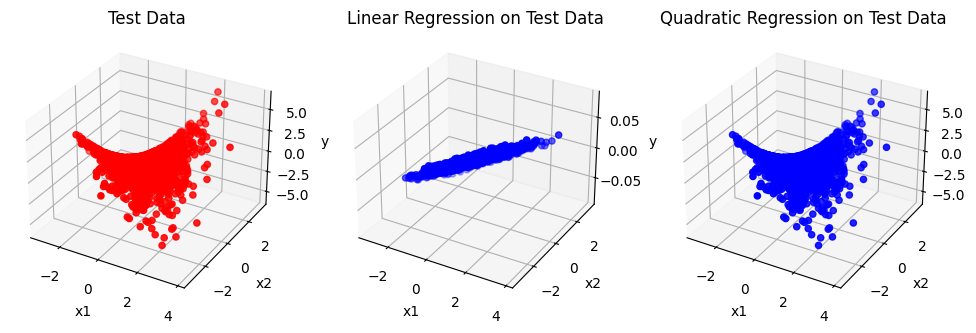

In [19]:
# WRITE YOUR OWN CODE HERE

X = np.random.randn(10000, 2)
y = X[:, 0] * X[:, 1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

clf1, clf2 = LinearRegression(), LinearRegression()
clf1.fit(x_train, y_train)
clf2.fit(x_train_poly, y_train)

y_pred, y_pred_poly = clf1.predict(x_test), clf2.predict(x_test_poly)

print("MSE with degree = 1: {}".format(np.mean((y_test - y_pred) ** 2)))
print("MSE with degree = 2: {}".format(np.mean((y_test - y_pred_poly) ** 2)))

fig, ax = plt.subplots(1, 3, figsize=(12, 4), subplot_kw={"projection": "3d"})
ax[0].scatter(x_test[:, 0], x_test[:, 1], y_test, c='r')
ax[0].set_xlabel("x1")
ax[0].set_ylabel('x2')
ax[0].set_zlabel('y')
ax[0].set_title("Test Data")

ax[1].scatter(x_test[:, 0], x_test[:, 1], y_pred, c='b')
ax[1].set_xlabel("x1")
ax[1].set_ylabel('x2')
ax[1].set_zlabel('y')
ax[1].set_title("Linear Regression on Test Data")

ax[2].scatter(x_test[:, 0], x_test[:, 1], y_pred_poly, c='b')
ax[2].set_xlabel("x1")
ax[2].set_ylabel('x2')
ax[2].set_zlabel('y')
ax[2].set_title("Quadratic Regression on Test Data")

plt.show()

## 3 - The Perceptron (**Coding**)

#### (a)

Generate a simple, linearly separable dataset of 4 classes. Make a scatterplot and check that the dataset is linearly separable. If it is not, generate a new dataset until it is.

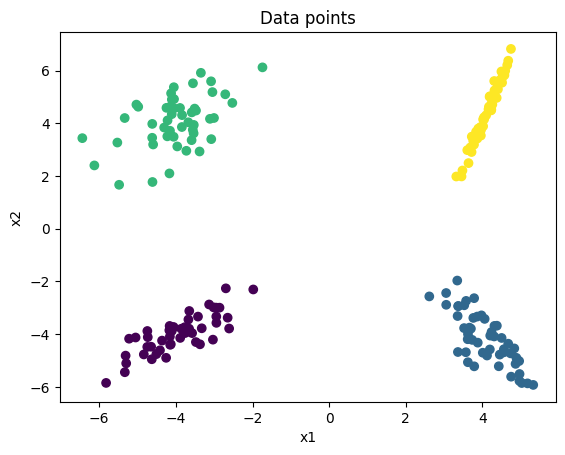

In [20]:
#Generate a linearly separable dataset (for instance, you can use make_classification and change the random state until it is)

#HINT: use the class_sep parameter and set it equal to the number of classes to increase the separation between them

#WRITE YOUR OWN CODE HERE

X, y = datasets.make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=4,
    class_sep=4,  # here
    random_state=0
    )

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Data points")
plt.show()

#### (b)
Train a perceptron on this dataset. Plot the decision boundary and the data points.

Accuracy on the training set: 1.0
Accuracy on the test set: 1.0


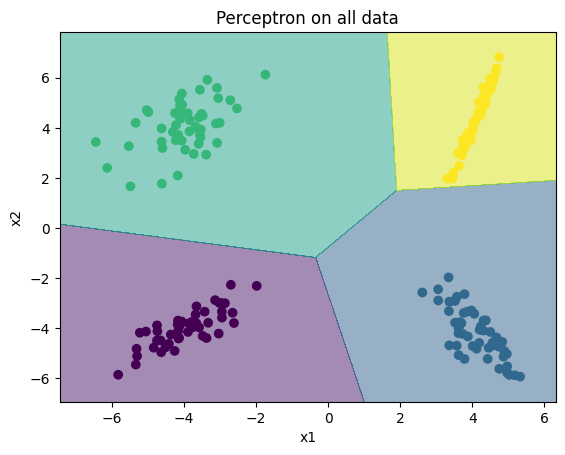

In [21]:
from sklearn.linear_model import Perceptron

# WRITE YOUR OWN CODE HERE

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = Perceptron()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("Accuracy on the training set: {}".format(clf.score(x_train, y_train)))
print("Accuracy on the test set: {}".format(clf.score(x_test, y_test)))

x1_min, x1_max = np.min(x_test[:, 0]) - 1, np.max(x_test[:, 0]) + 1
x2_min, x2_max = np.min(x_test[:, 1]) - 1, np.max(x_test[:, 1]) + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)

plt.contourf(xx1, xx2, z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron on all data")
plt.show()

#### (c)
What happens when the classes in the dataset are not linearly separable? Regenerate the dataset (this time, not linearly separable) and train the perceptron again. What do you observe?

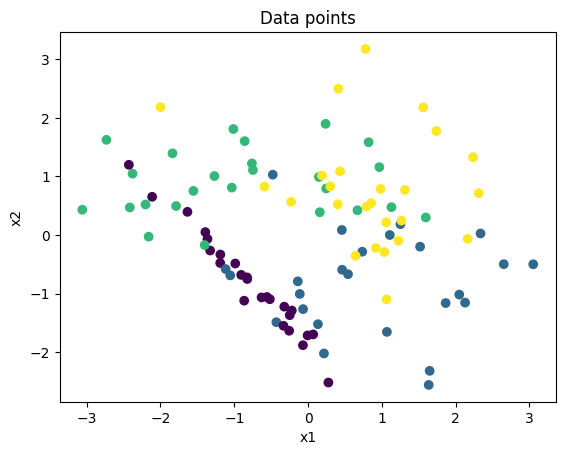

In [22]:
# Regenerate the data ...

#WRITE YOUR OWN CODE HERE

#POSSIBLE SOLUTION

X, y = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes = 4,
    class_sep=0.8
    )

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points')
plt.show()

Accuracy on the training set: 0.55


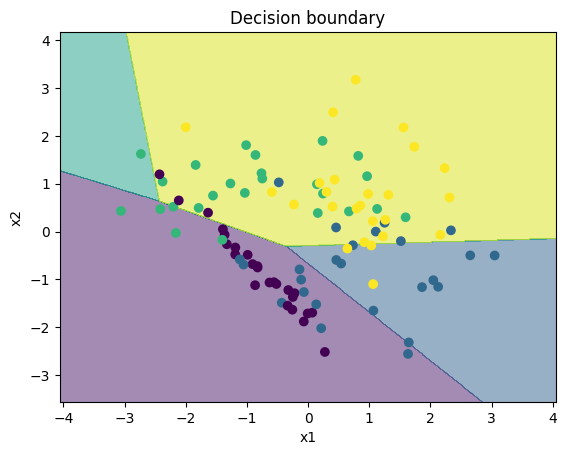

In [23]:
# ... and train again

# WRITE YOUR OWN CODE HERE

# POSSIBLE SOLUTION

clf = Perceptron()
clf.fit(X, y)

y_pred = clf.predict(X)

accuracy = np.mean(y_pred == y)
print('Accuracy on the training set:', accuracy)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary')
plt.show()

# As we can see, the decision boundary cannot separate the data, as the perceptron is a linear classifier and the data is not linearly separable.